In [86]:
import sys
sys.path.append('d:/flagellar/code/core')
sys.path.append('/kaggle/code/core')
sys.path.append('/kaggle/input/my-flg-library/')
import flg_support as fls
import importlib
import numpy as np
import flg_diagnostics
import flg_numerics
import matplotlib.pyplot as plt
import glob
import copy
importlib.reload(fls);
fls.profiling=False

MainProcess


In [99]:
files = glob.glob(fls.result_dir + '/many_abbr_full/Baseline_*M*')
models = [fls.dill_load(f) for f in files]
models = sorted(models, key=lambda d:d.trained_model.seed)

In [ ]:
for m in models[0:1]:
    m.trained_model.step1Labels.relative_confidence_threshold = 0.001
    m.inferred_test_data = m.trained_model.infer(m.test_data)

In [ ]:
fls.dill_save(fls.temp_dir + '/models_reinferred.pickle', models)

In [101]:
data = copy.deepcopy(models[0].inferred_test_data)

In [102]:
def visualize_slice(data, z):
    preprocessor = copy.deepcopy(models[0].trained_model.step1Labels.preprocessor)
    #preprocessor.blur_z = 5
    data = copy.deepcopy(data)
    preprocessor.load_and_preprocess(data)
    for i_z in range(len(data.slices_present)):
        if data.slices_present[i_z]==z:
            break
    else:
        raise 'stop'
    plt.figure()
    plt.imshow(data.data[i_z,:,:], cmap='bone')
    plt.colorbar()
    plt.title(data.name + ', ' + str(z))
    for mm in range(1):
        # m = copy.deepcopy(models[mm].trained_model)
        # m.step1Labels.relative_confidence_threshold = 0.01
        # m.step2Motors.distance_threshold = 10.
        # m.run_in_parallel = False
        dat = m.infer([data])
        #dat = models[mm].inferred_test_data
        for d in dat:
            if d.name == data.name:
                to_plot = d.labels_unfiltered2
            
                to_plot = to_plot[to_plot['z']==z]
                print(to_plot)
        
                plt.scatter(to_plot['x'], to_plot['y'])
                #print(dat)    

AttributeError: 'ModelRunner' object has no attribute 'infer'

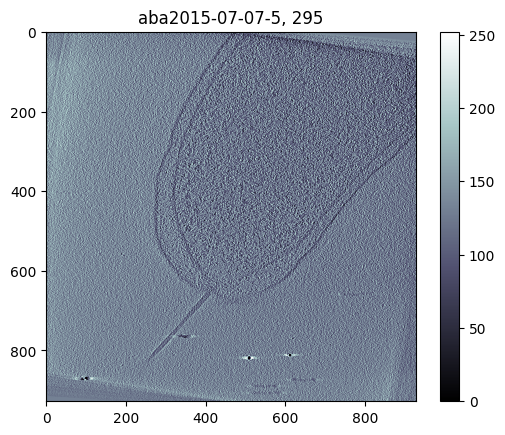

In [103]:
data[100].name
for z in np.arange(295,297):
    visualize_slice(data[100], z)

In [18]:
%debug

> d:\flagellar\code\core\flg_support.py(343)load_to_memory()
    341                     n_done += 1
    342 
--> 343             assert n_done == len(desired_slices)
    344             self.slices_present = desired_slices
    345 



ipdb>  n_done


0


ipdb>  desired_slices


[8]


ipdb>  q


In [53]:
data[100]

DataExtra(is_train=True, name='aba2015-07-07-5', labels=   index    z    y    x  confidence     value
0      0  300  280  343    0.529297  0.529297, labels_unfiltered=     z    y    x  confidence
0  300  280  343    0.529297
1  291  373  767    0.186523, labels_unfiltered2=      z    y    x  confidence  i_model
0   285  293  350    0.294189        0
21  291  373  767    0.186523        0
40  296  286  345    0.426270        0
48  300  280  343    0.529297        0
49  301  284  341    0.340820        0, loaded_state='unloaded', data=None, data_shape=(800, 928, 928), voxel_spacing=13.236, resize_factor=1.0, slices_present=[])

In [29]:
dat = copy.deepcopy(data[100])
dat = models[0].trained_model.infer([dat])[0]
dat

Clearing cupy


DataExtra(is_train=True, name='aba2015-07-07-5', labels=   index    z    y    x  confidence     value
0      0  300  280  343    0.529297  0.529297, labels_unfiltered=     z    y    x  confidence
0  300  280  343    0.529297
1  291  373  767    0.186523, labels_unfiltered2=      z    y    x  confidence  i_model
0   285  293  350    0.294189        0
21  291  373  767    0.186523        0
40  296  286  345    0.426270        0
48  300  280  343    0.529297        0
49  301  284  341    0.340820        0, loaded_state='unloaded', data=None, data_shape=(800, 928, 928), voxel_spacing=13.236, resize_factor=1.0, slices_present=[])

In [42]:
models[0].inferred_test_data[100]

DataExtra(is_train=True, name='aba2015-07-07-5', labels=   index    z    y    x  confidence     value
0      0  300  280  343    0.529297  0.529297, labels_unfiltered=     z    y    x  confidence
0  300  280  343    0.529297
1  291  373  767    0.186523, labels_unfiltered2=      z    y    x  confidence  i_model
0   285  293  350    0.294189        0
21  291  373  767    0.186523        0
40  296  286  345    0.426270        0
48  300  280  343    0.529297        0
49  301  284  341    0.340820        0, loaded_state='unloaded', data=None, data_shape=(800, 928, 928), voxel_spacing=13.236, resize_factor=1.0, slices_present=[])